In [29]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

In [30]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']
X = X/255 

np.random.seed(0)

subset_idx = np.random.choice(len(X), size=int(len(X) * 0.1), replace=False)
X_subset, y_subset = X[subset_idx], y[subset_idx]
train_X, train_y = X_subset[:6000], y_subset[:6000]
test_X, test_y = X_subset[6000:], y_subset[6000:]

In [31]:
def plot_digit(digit):
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off')
    plt.show()

In [32]:
bootstrap_iterations = [1, 2, 11, 22, 44, 88, 176, 352]
k_values = np.arange(1, 11)
mean_accuracies = np.zeros((len(bootstrap_iterations), len(k_values)))

In [ ]:
for k in k_values:
    for i, num_bootstrap in enumerate(bootstrap_iterations):
        accuracies = []
        for _ in range(num_bootstrap):
            bootstrap_X, bootstrap_y = resample(train_X, train_y)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(bootstrap_X, bootstrap_y)
            accuracies.append(knn.score(test_X, test_y))
        mean_accuracies[i, k-1] = np.mean(accuracies)

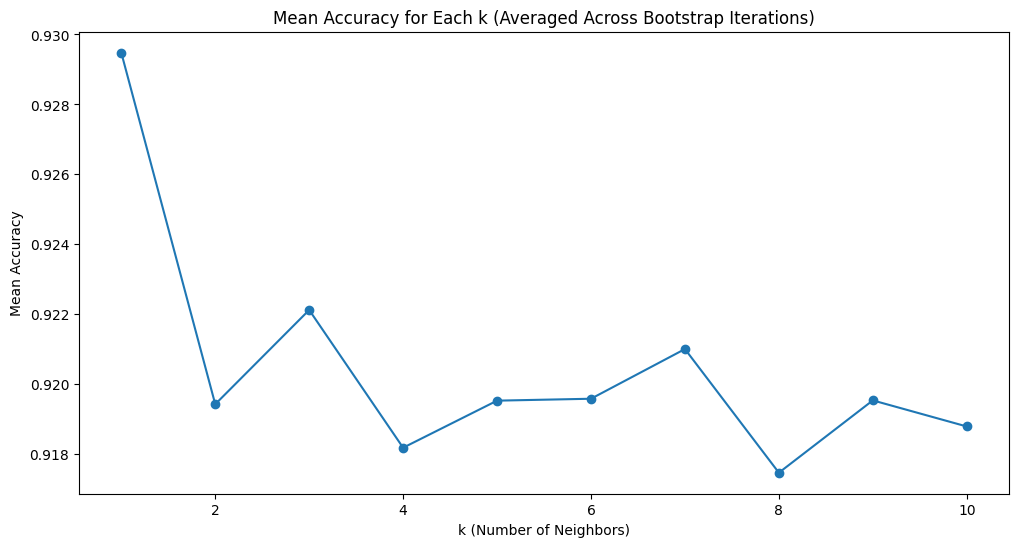

In [41]:
stabilization_accuracies = np.mean(mean_accuracies, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(k_values, stabilization_accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy for Each k (Averaged Across Bootstrap Iterations)')
plt.show()

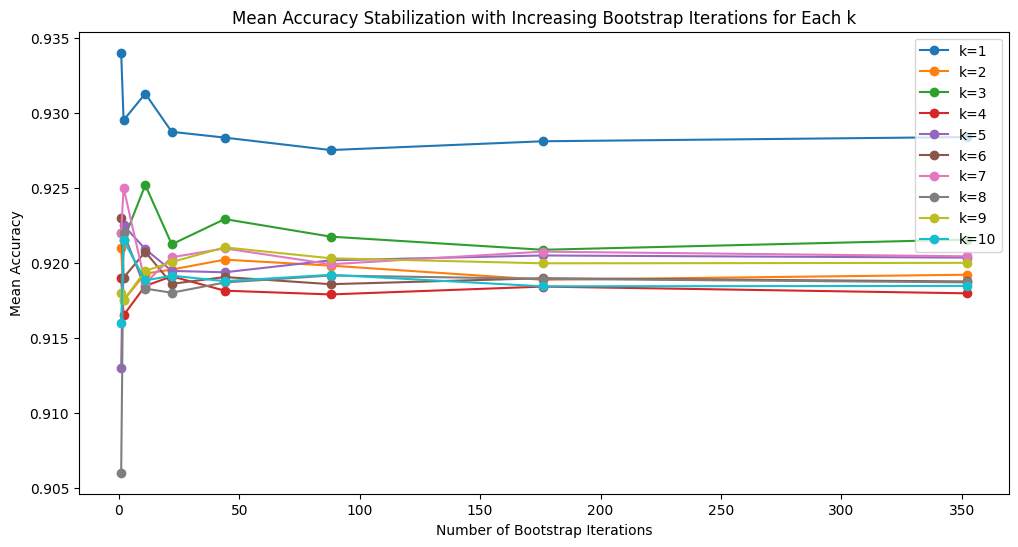

In [40]:
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    plt.plot(bootstrap_iterations, mean_accuracies[:, i], label=f'k={k}', marker='o')

plt.xlabel('Number of Bootstrap Iterations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Stabilization with Increasing Bootstrap Iterations for Each k')
plt.legend()
plt.show()